In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [7]:
#Identify the outliers in the dataset
#Identify the null values, in case of age nan can be replaced by mean value and cabins can be replaced by some random alphabet and numeric value

#data visualization process should also be done on the data
#label encoding on maximum columns should be done

In [8]:
df=train
df['Age'].fillna(-0.5,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Cabin'].fillna('Z123',inplace=True)
df
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z123,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Z123,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.4500,Z123,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Sex', ylabel='Survived'>

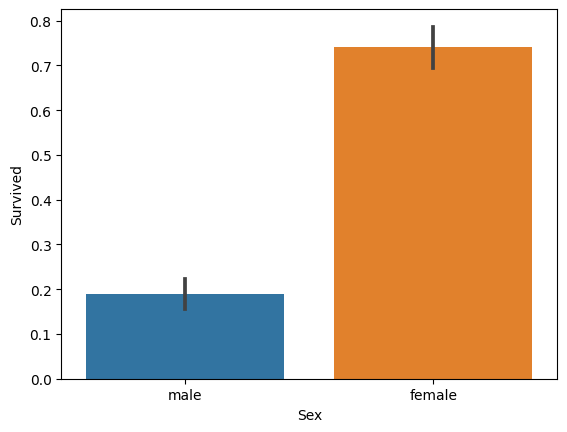

In [11]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

x=sns.barplot(x="Sex",y="Survived",data=df)
x

In [12]:
print("Percentage of women who survived:",df[df["Sex"] == "female"]["Survived"].value_counts(normalize=True)[1] * 100)

Percentage of women who survived: 74.20382165605095


Percentage of pclass 1:  62.96296296296296
Percentage of pclass 2:  47.28260869565217
Percentage of pclass 3:  24.236252545824847


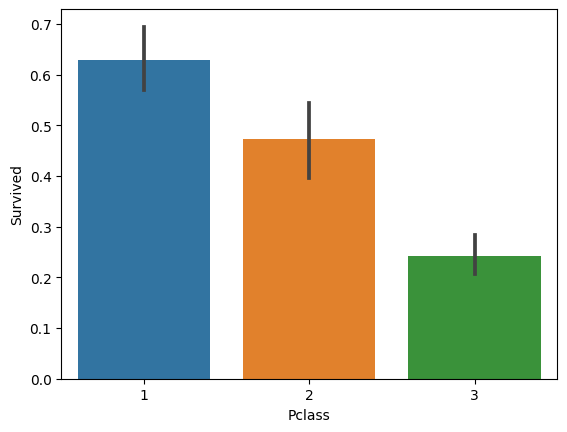

In [13]:
#pclass
x=sns.barplot(x="Pclass",y="Survived",data=df)
print("Percentage of pclass 1: ",df[df['Pclass']==1]['Survived'].value_counts(normalize=True)[1]*100)
print("Percentage of pclass 2: ",df[df['Pclass']==2]['Survived'].value_counts(normalize=True)[1]*100)
print("Percentage of pclass 3: ",df[df['Pclass']==3]['Survived'].value_counts(normalize=True)[1]*100)


<Axes: xlabel='AgeGroup', ylabel='Survived'>

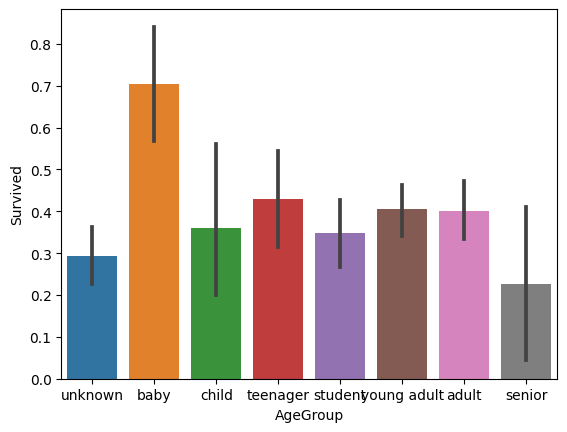

In [14]:
#Age
test['Age']=test['Age'].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['unknown','baby','child','teenager','student','young adult','adult','senior']
df['AgeGroup']=pd.cut(df['Age'],bins,labels=labels)
test['AgeGroup']=pd.cut(test['Age'],bins,labels=labels)

sns.barplot(x="AgeGroup",y="Survived",data=df)

In [15]:
df=df.drop(columns=['Ticket','Fare','Cabin'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,young adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,young adult
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,young adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,S,unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,young adult


In [16]:
test=test.drop(columns=['Ticket','Fare','Cabin'])
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q,young adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S,adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q,senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S,young adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S,student
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,S,unknown
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,C,adult
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,S,adult
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,S,unknown


In [17]:
#Missing values
print("Number of people embarked from S: ",df[df['Embarked']=='S'].shape[0])
print("Number of people embarked from C: ",df[df['Embarked']=='C'].shape[0])
print("Number of people embarked from O: ",df[df['Embarked']=='0'].shape[0])

Number of people embarked from S:  644
Number of people embarked from C:  168
Number of people embarked from O:  0


In [18]:
df['Embarked'].fillna('S')
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [19]:
combine=[df,test]
for dataset in combine :
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(df['Title'],df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for dataset in combine :
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Countless','Don','Dr','Jonkheer','Major','Rev'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [21]:
list(df[['Title','Survived']].groupby(['Title'],as_index=False).mean()['Title'])

['Master', 'Miss', 'Mr', 'Mrs', 'Rare', 'Royal']

In [22]:
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Royal":5,"Rare":6}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)

In [23]:
mr_age=df[df['Title']==1]['AgeGroup'].mode()
miss_age=df[df['Title']==2]['AgeGroup'].mode()
mrs_age=df[df['Title']==3]['AgeGroup'].mode()
master_age=df[df['Title']==4]['AgeGroup'].mode()
royal_age=df[df['Title']==5]['AgeGroup'].mode()
rare_age=df[df['Title']==6]['AgeGroup'].mode()

In [24]:
mr_age,miss_age,mrs_age,master_age,royal_age,rare_age

(0    young adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenager' < 'student' < 'young adult' < 'adult' < 'senior'],
 0    unknown
 Name: AgeGroup, dtype: category
 Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenager' < 'student' < 'young adult' < 'adult' < 'senior'],
 0    adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenager' < 'student' < 'young adult' < 'adult' < 'senior'],
 0    baby
 Name: AgeGroup, dtype: category
 Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenager' < 'student' < 'young adult' < 'adult' < 'senior'],
 0    adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenager' < 'student' < 'young adult' < 'adult' < 'senior'],
 0    adult
 Name: AgeGroup, dtype: category
 Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenager' < 'student' < 'young adult' < 'adult' < 'senior'])

In [25]:
age_title_map={1:'Young Adult',2:"Student",3:"Adult",4:"Baby",5:"Adult",6:"Adult"}

for i in range(len(df['AgeGroup'])):
    if df['AgeGroup'][i]=="Unknown":
        df['AgeGroup'][i]=age_title_map(df['AgeGroup'][i])
        
        
for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i]=="Unknown":
        test['AgeGroup'][i]=age_title_map(test['AgeGroup'][i])

In [26]:
df.AgeGroup.unique()

['student', 'adult', 'young adult', 'unknown', 'baby', 'teenager', 'child', 'senior']
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenager' < 'student' < 'young adult' < 'adult' < 'senior']

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,young adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,young adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,young adult,1


In [28]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

transform=['Sex','AgeGroup','Embarked']

for i in transform:
    df[i]=le.fit_transform(df[i])
    test[i]=le.fit_transform(test[i])

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,7,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,7,1


In [30]:
xtrain=df.drop(['PassengerId','Name','Survived'],axis=1)
ytrain=df['Survived']


In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,1,7,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2,0,3.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,3,1.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,2,7,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,2,4,3.0


In [32]:
xtest=test.drop(['PassengerId','Name'],axis=1)
xtest

,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,3,1,34.5,0,0,1,7,1.0
1,3,0,47.0,1,0,2,0,3.0
2,2,1,62.0,0,0,1,3,1.0
3,3,1,27.0,0,0,2,7,1.0
4,3,0,22.0,1,1,2,4,3.0
...,...,...,...,...,...,...,...,...
413,3,1,-0.5,0,0,2,6,1.0
414,1,0,39.0,0,0,0,0,0.0
415,3,1,38.5,0,0,2,0,1.0
416,3,1,-0.5,0,0,2,6,1.0


In [33]:

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)

In [34]:
ids=test['PassengerId']

outputs=pd.DataFrame({"PassengerId":ids,'Survived':pred})

In [35]:
outputs


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
outputs.to_csv('submission.csv',index=False)